In [1]:
import pandas as pd
from pathlib import Path

# Chargement du dataset

In [2]:
csv_path = Path("..") / "data" / "articles.csv"
df = pd.read_csv(csv_path)

# Affichage général

In [3]:
# Affichage général
print(f"Nombre total d'articles: {len(df)}")
print(f"Colonnes disponibles: {df.columns.tolist()}")
print("\nNombre d'articles par catégorie:")
print(df['section'].value_counts())

Nombre total d'articles: 60000
Colonnes disponibles: ['section', 'title', 'text']

Nombre d'articles par catégorie:
section
Business      10000
Politics      10000
Culture       10000
Sport         10000
Technology    10000
World news    10000
Name: count, dtype: int64


In [4]:
print("\n--- Aperçus par catégorie ---")
# Boucle sur chaque catégorie unique
for section in df['section'].unique():
    print(f"\n### Catégorie : {section} ###")
    display(df[df['section'] == section].head(3))  # 3 premiers articles pour chaque catégorie


--- Aperçus par catégorie ---

### Catégorie : Business ###


,section,title,text
0,Business,Fuel tanker rates surge as Middle East crisis ...,two tankers have collided in waters off the un...
1,Business,UK bank TSB could be sold off by Spanish owner...,the spanish bank sabadell has said it has rece...
2,Business,World’s largest banks pledged $869bn to fossil...,the worlds largest banks boosted the amount of...



### Catégorie : Politics ###


,section,title,text
10000,Politics,Louise Casey criticises Tories for politicisin...,keir starmer and donald trump signed off a uku...
10001,Politics,Britons in Israel told to notify Foreign Offic...,british people in israel are being told to reg...
10002,Politics,Keir Starmer’s biggest U-turns since Labour ca...,keir starmers midair announcement that he was ...



### Catégorie : Culture ###


,section,title,text
20000,Culture,‘Nobody makes a record like that for the money...,jon king singer songwriter i grew up in a real...
20001,Culture,Eric Cantona and Ella Toone help meld football...,everybody needs his own ritual or way of prepa...
20002,Culture,"At a festival, are you Elinor or Marianne? | B...",your articles presented two entertaining but v...



### Catégorie : Sport ###


,section,title,text
30000,Sport,Thunder move one win from first NBA title in 4...,the oklahoma city thunder moved within one win...
30001,Sport,Johnny Sexton insists he is ‘here to help’ Fin...,johnny sexton has insisted he is here to help ...
30002,Sport,Dan Evans reproduces form of old to beat Franc...,dan evans opened up the mens tournament at que...



### Catégorie : Technology ###


,section,title,text
40000,Technology,Makers of air fryers and smart speakers told t...,makers of air fryers smart speakers fertility ...
40001,Technology,"Liverpool is crypto capital of UK, survey finds",the citys most famous sons may have sung that ...
40002,Technology,UK government rollout of Humphrey AI tool rais...,the governments artificial intelligence ai too...



### Catégorie : World news ###


,section,title,text
50000,World news,Iran and Israel trade more attacks as Trump de...,china has said some of its citizens have been ...
50001,World news,‘They were my everything’: tributes paid as na...,tributes are being made to the passengers who ...
50002,World news,At least 15 die in Russian strikes on Kyiv in ...,on the g7 summit in canada my colleagues patri...


In [5]:
df['text'][0]

'two tankers have collided in waters off the united arab emirates and caught fire in the early hours this morning the united arab emirates coast guard says it evacuated 24 people from oil tanker adalynn following a collision between two ships in the gulf of oman near the strait of hormuz british maritime security firm ambrey has said the cause of the incident was not securityrelated daniel smith an analyst at ambrey said via bloomberg at the time of writing we can only confirm that it is not a security incident we continue to investigate the cause global oil supply is set to increase far faster than demand in the coming years the international energy agency has predicted in a new report the iea argues that oil markets are undergoing structural changes as the key drivers of supply and demand growth of the past 15 years start to fade the iea estimates that global oil demand is forecast to increase by 25 million barrels per day mbd between 2024 and 2030 reaching a plateau of around 1055 m

In [6]:
import sys
sys.path.append('../nlp') 

from preprocessing import Preprocessing

preprocessor = Preprocessing()

# S'assurer que la colonne texte n'a pas de valeurs manquantes
df = df[df['text'].notnull()].copy()

# Initialiser la colonne 'clean_text' vide
df['clean_text'] = None

# Appliquer le traitement sur les 3 premiers articles de chaque section
for section in df['section'].unique():
    # Récupère les indices des 3 premiers articles de la section
    section_indices = df[df['section'] == section].head(1).index
    df.loc[section_indices, 'clean_text'] = df.loc[section_indices, 'text'].apply(preprocessor.preprocess)


In [7]:
# Check how many were processed
print(df['clean_text'].notnull().sum())

6


In [8]:
from IPython.display import display

# Filtrer uniquement les lignes où le prétraitement a été appliqué
df_subset = df[df['clean_text'].notnull()][['section', 'text', 'clean_text']]
pd.set_option('display.max_colwidth', 200)

display(df_subset)

,section,text,clean_text
0,Business,two tankers have collided in waters off the united arab emirates and caught fire in the early hours this morning the united arab emirates coast guard says it evacuated 24 people from oil tanker ad...,two tanker collided water united arab emirate caught fire early hour morning united arab emirate coast guard say evacuated people oil tanker adalynn following collision two ship gulf oman near str...
10000,Politics,keir starmer and donald trump signed off a ukus trade deal at the g7 summit in canada with the us president saying britain would have protection against future tariffs because i like them peter wa...,keir starmer donald trump signed ukus trade deal g summit canada u president saying britain would protection future tariff like peter walker report deal uk aerospace sector avoids u tariff car ind...
20000,Culture,jon king singer songwriter i grew up in a really boring village in kent so moving to leeds as a student was thrilling it was an alist place to see gigs on the other hand the buildings were as blac...,jon king singer songwriter grew really boring village kent moving leeds student thrilling alist place see gig hand building black soot yorkshire ripper around could feel tension national front sou...
30000,Sport,the oklahoma city thunder moved within one win of their first nba championship in 46 years on monday night beating the indiana pacers 120109 in game 5 of the nba finals to take a 32 series lead ja...,oklahoma city thunder moved within one win first nba championship year monday night beating indiana pacer game nba final take series lead jalen williams erupted career playoffhigh point mvp shai g...
40000,Technology,makers of air fryers smart speakers fertility trackers and smart tvs have been told to respect peoples rights to privacy by the uk information commissioners office ico people have reported feeling...,maker air fryer smart speaker fertility tracker smart tv told respect people right privacy uk information commissioner office ico people reported feeling powerless control data gathered used share...
50000,World news,china has said some of its citizens have been able to leave iran agence francepresse afp reports foreign ministry spokesman guo jiakun told reporters in bejing at present some chinese citizens hav...,china said citizen able leave iran agence francepresse afp report foreign ministry spokesman guo jiakun told reporter bejing present chinese citizen safely evacuated neighbouring country israel ir...


In [9]:
df_subset['original_len'] = df_subset['text'].apply(lambda x: len(str(x).split()))
df_subset['cleaned_len'] = df_subset['clean_text'].apply(lambda x: len(str(x).split()))

df_subset[['section', 'original_len', 'cleaned_len']]

,section,original_len,cleaned_len
0,Business,2175,1271
10000,Politics,917,474
20000,Culture,797,430
30000,Sport,666,377
40000,Technology,378,206
50000,World news,5432,3245


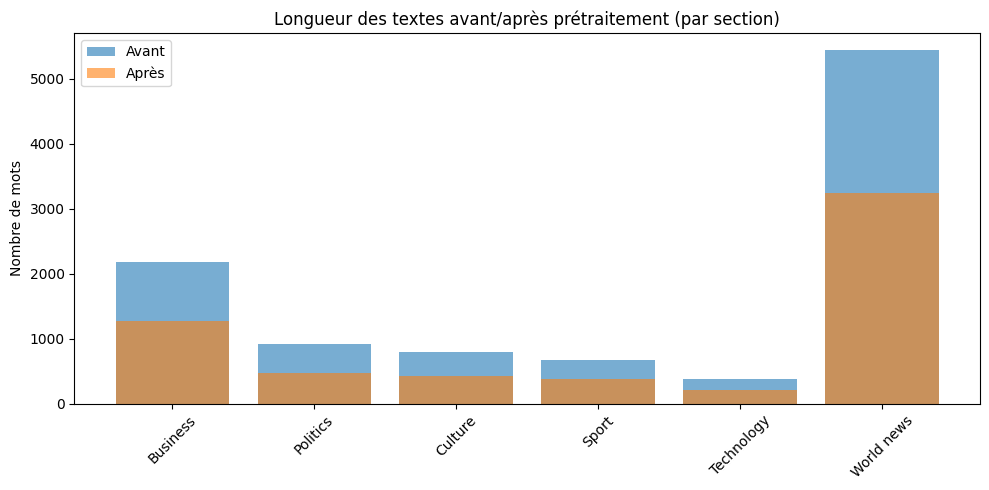

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_subset['section'], df_subset['original_len'], alpha=0.6, label='Avant')
plt.bar(df_subset['section'], df_subset['cleaned_len'], alpha=0.6, label='Après')
plt.ylabel("Nombre de mots")
plt.title("Longueur des textes avant/après prétraitement (par section)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

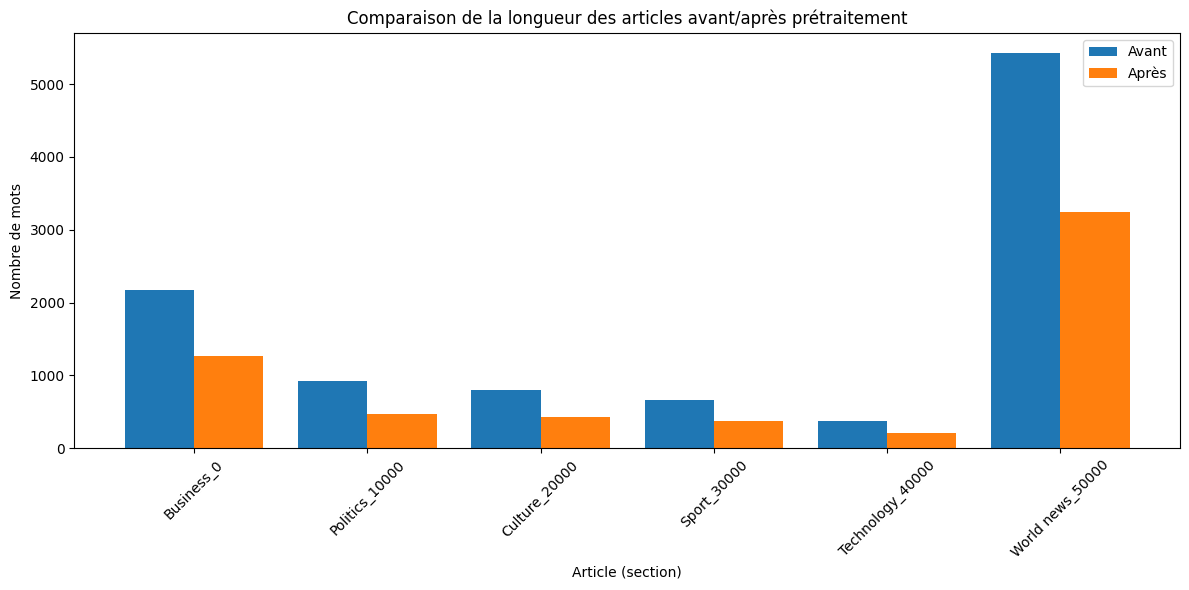

In [11]:
import numpy as np

x = np.arange(len(df_subset))  # positions
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, df_subset['original_len'], width=width, label='Avant')
plt.bar(x + width/2, df_subset['cleaned_len'], width=width, label='Après')

plt.title("Comparaison de la longueur des articles avant/après prétraitement")
plt.xlabel("Article (section)")
plt.ylabel("Nombre de mots")
plt.xticks(x, df_subset['section'] + "_" + df_subset.index.astype(str), rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
df_subset['reduction_ratio'] = 1 - (df_subset['cleaned_len'] / df_subset['original_len'])
df_subset[['section', 'original_len', 'cleaned_len', 'reduction_ratio']]

,section,original_len,cleaned_len,reduction_ratio
0,Business,2175,1271,0.415632
10000,Politics,917,474,0.483097
20000,Culture,797,430,0.460477
30000,Sport,666,377,0.433934
40000,Technology,378,206,0.455026
50000,World news,5432,3245,0.402614



=== Article index 0 - Section: Business - Original Text ===
two tankers have collided in waters off the united arab emirates and caught fire in the early hours this morning the united arab emirates coast guard says it evacuated 24 people from oil tanker adalynn following a collision between two ships in the gulf of oman near the strait of hormuz british maritime security firm ambrey has said the cause of the incident was not securityrelated daniel smith an analyst at ambrey said via bloomberg at the time of writing we can only confirm that it is not a security incident we continue to investigate the cause global oil supply is set to increase far faster than demand in the coming years the international energy agency has predicted in a new report the iea argues that oil markets are undergoing structural changes as the key drivers of supply and demand growth of the past 15 years start to fade the iea estimates that global oil demand is forecast to increase by 25 million barrels per day m

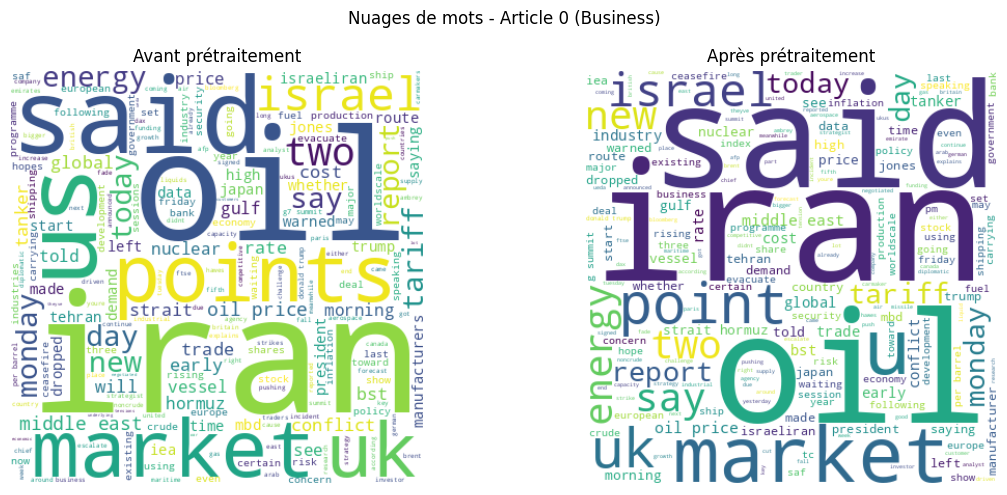


=== Article index 10000 - Section: Politics - Original Text ===
keir starmer and donald trump signed off a ukus trade deal at the g7 summit in canada with the us president saying britain would have protection against future tariffs because i like them peter walker reports under the deal the uk aerospace sector avoids all us tariffs and the car industry faces tariffs of 10 down from 25 but the steel industy still faces tariffs of 25 speaking about the deal on bbc breakfast this morning heidi alexander the transport secrtary said were working through some technical detail around steel because we want to bring that 25 tariff that applies at the moment obviously down further but i think the fact that were in this unique position were the only country in the world to have already got a trade agreement with the us we are working on getting that implemented weve made some progress on car manufacturing which is going to be really important for companies such as jaguar land rover based in soli

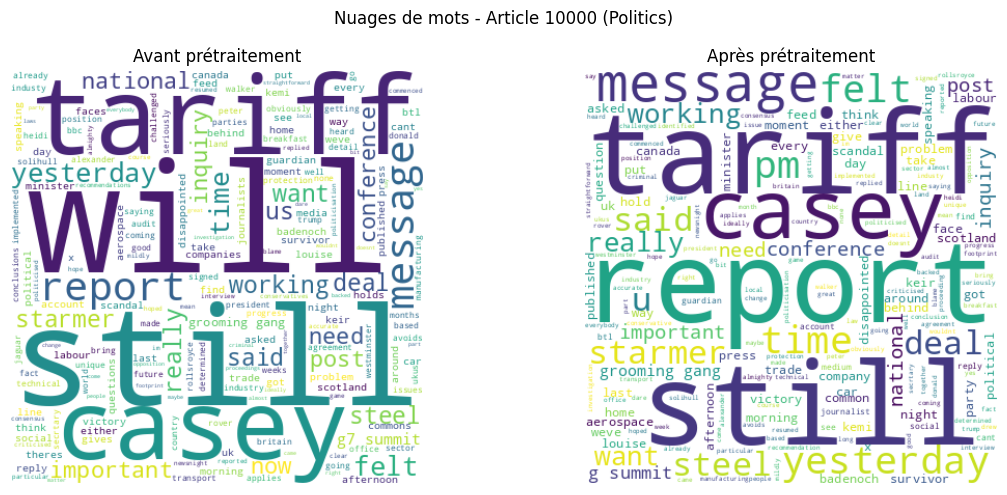


=== Article index 20000 - Section: Culture - Original Text ===
jon king singer songwriter i grew up in a really boring village in kent so moving to leeds as a student was thrilling it was an alist place to see gigs on the other hand the buildings were as black as soot the yorkshire ripper was around and you could feel the tension between the national front and the south asian community i saw swastikas on walls and on an antinf march i was hit with a truncheon by a mounted police officer so i gradually came up with the modest ambition to change the world i had known andy gill our guitarist since primary school we were like brothers but also chalk and cheese musically the four of us in the band never let each other off the hook  which sometimes resulted in actual fights that tension fed the music andy wasnt a trained guitarist but had this genius way of flicking his fingers and stabbing at the instrument like it was his personal enemy which would become hugely influential wed started as

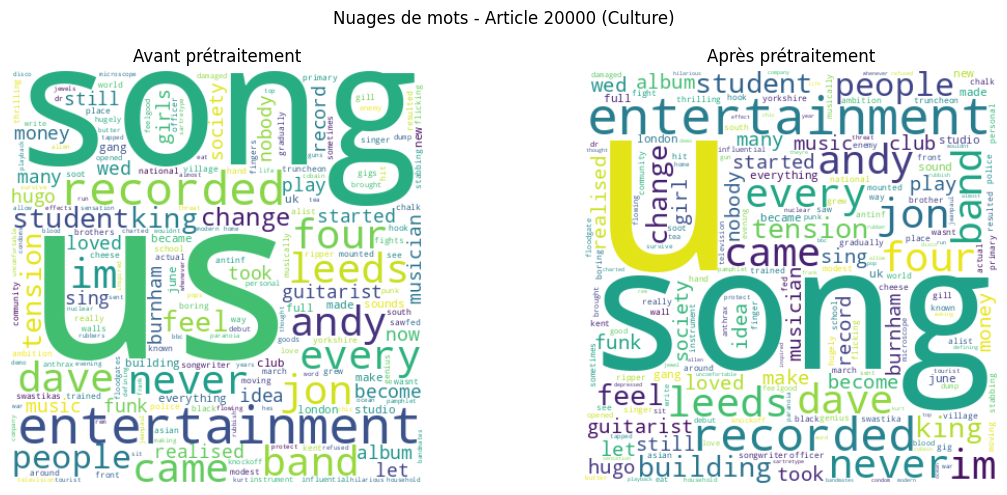


=== Article index 30000 - Section: Sport - Original Text ===
the oklahoma city thunder moved within one win of their first nba championship in 46 years on monday night beating the indiana pacers 120109 in game 5 of the nba finals to take a 32 series lead jalen williams erupted for a career playoffhigh 40 points mvp shai gilgeousalexander added 31 points and 10 assists and the thunder held off a furious indiana rally to secure a chance at clinching their first title since 1979 in game 6 on thursday in indianapolis it was the 10th time this postseason that gilgeousalexander and williams combined for more than 70 points in a game williams was 14of25 from the field and added six rebounds and four assists including several key buckets late in the fourth as the thunder weathered a pacers push that was honestly the same exact game as game 1 williams said learning through these finals thats what makes a team good for three quarters it looked like the thunder were learning fast oklahoma city l

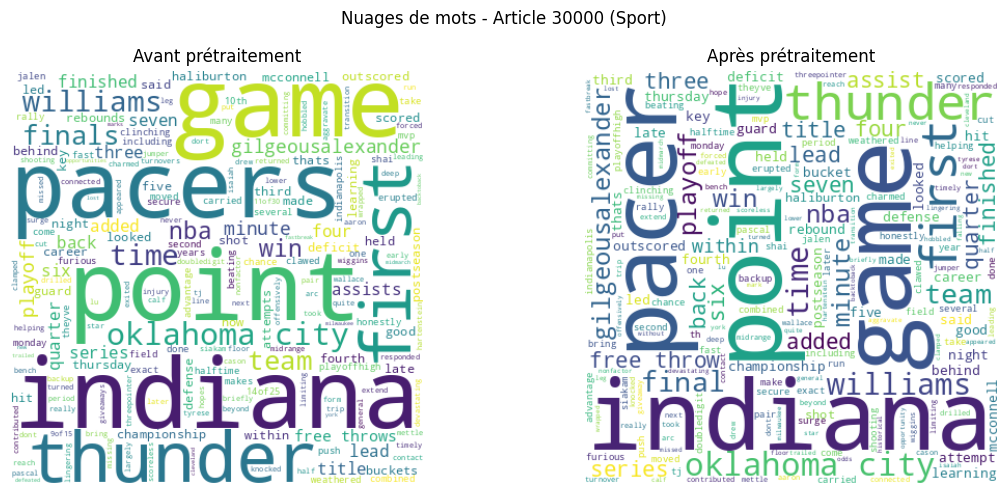


=== Article index 40000 - Section: Technology - Original Text ===
makers of air fryers smart speakers fertility trackers and smart tvs have been told to respect peoples rights to privacy by the uk information commissioners office ico people have reported feeling powerless to control how data is gathered used and shared in their own homes and on their bodies after reports of air fryers designed to listen in to their surroundings and public concerns that digitised devices collect an excessive amount of personal information the data protection regulator has issued its first guidance on how peoples personal information should be handled it is demanding that manufacturers and data handlers ensure data security are transparent with consumers and ensure the regular deletion of collected information stephen almond the executive director for regulatory risk at the ico said smart products know a lot about us who we live with what music we like what medication we are taking and much more they ar

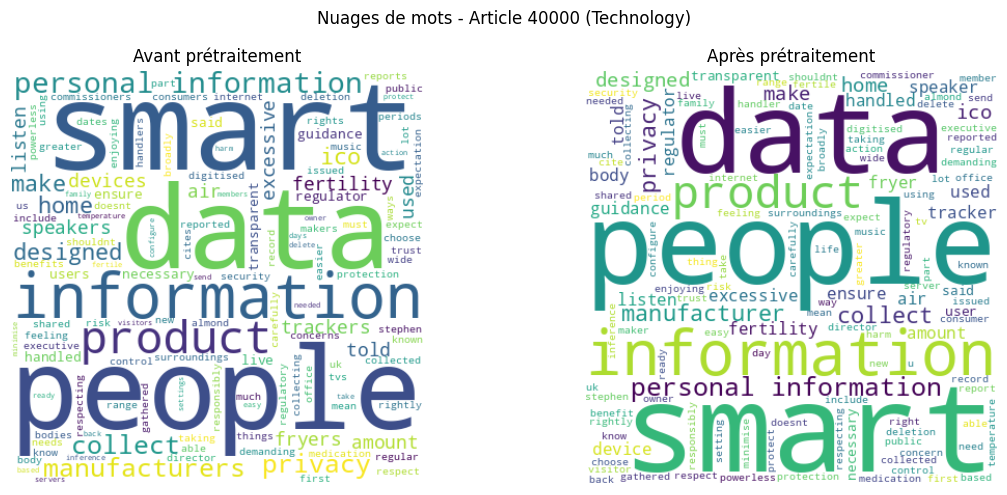


=== Article index 50000 - Section: World news - Original Text ===
china has said some of its citizens have been able to leave iran agence francepresse afp reports foreign ministry spokesman guo jiakun told reporters in bejing at present some chinese citizens have been safely evacuated to neighbouring countries israel and iran have both closed their airspace since the conflict broke out when israel began striking military and nuclear targets in iran on friday the thai government has ordered its military to prepare planes to evacuate citizens from israel and iran a spokesperson said tuesday as the two sides exchanged missile fire for a fifth day agence francepresse afp reports there are an estimated 40000 thai nationals currently living in israel most working on farms under a government labour scheme and about 300 nationals living in iran government spokesperson jirayu houngsub told reporters after a cabinet meeting we are ready to evacuate people and have coordinated with the military 

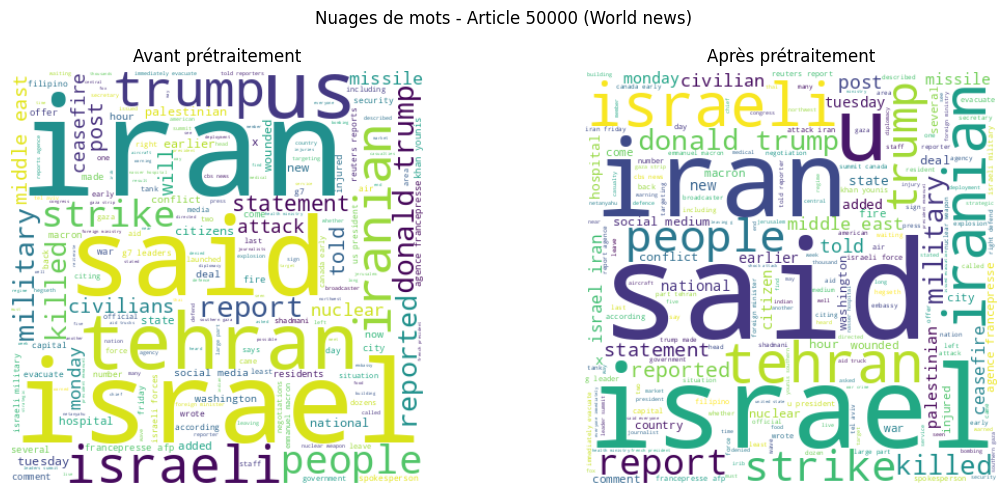

In [20]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Boucle sur chaque ligne du df_subset
for i, row in df_subset.iterrows():
    original_text = str(row['text'])
    cleaned_text = str(row['clean_text'])
    print(f"\n=== Article index {i} - Section: {row['section']} - Original Text ===")
    print(original_text)
    print(f"\n=== Article index {i} - Section: {row['section']} - Cleaned Text ===")
    print(cleaned_text)
    
    # Compter les mots
    original_words = original_text.split()
    cleaned_words = cleaned_text.split()
    
    original_freq = Counter(original_words).most_common(10)
    cleaned_freq = Counter(cleaned_words).most_common(10)
    
    print(f"\n=== Article index {i} - Section: {row['section']} ===")
    print("Top 10 mots AVANT prétraitement:")
    print(original_freq)

    count_us = original_words.count('us')
    print(f"Nombre d'occurrences du mot 'us' dans le texte original : {count_us}")
    
    print("Top 10 mots APRÈS prétraitement:")
    print(cleaned_freq)

    


    # Générer les wordclouds
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    wordcloud_orig = WordCloud(width=400, height=400, background_color='white').generate(original_text)
    axs[0].imshow(wordcloud_orig, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title("Avant prétraitement")

    wordcloud_clean = WordCloud(width=400, height=400, background_color='white').generate(cleaned_text)
    axs[1].imshow(wordcloud_clean, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title("Après prétraitement")
    
    plt.suptitle(f"Nuages de mots - Article {i} ({row['section']})")
    plt.tight_layout()
    plt.show()


In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def analyze_section_aggregate(df_subset, section_name):
    # Filtrer les articles de la section
    df_section = df_subset[df_subset['section'] == section_name]

    # Concaténer tous les textes en un seul gros texte
    original_text = " ".join(df_section['text'].astype(str).tolist())
    cleaned_text = " ".join(df_section['clean_text'].astype(str).tolist())

    # Top mots avant et après
    original_words = original_text.split()
    cleaned_words = cleaned_text.split()

    original_freq = Counter(original_words).most_common(10)
    cleaned_freq = Counter(cleaned_words).most_common(10)

    print(f"\n=== Section : {section_name} ===")
    print("Top 10 mots AVANT prétraitement :")
    print(original_freq)
    print("Top 10 mots APRÈS prétraitement :")
    print(cleaned_freq)

    # Wordclouds
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))

    wc_orig = WordCloud(width=600, height=400, background_color='white').generate(original_text)
    axs[0].imshow(wc_orig, interpolation='bilinear')
    axs[0].axis('off')
    axs[0].set_title(f"WordCloud avant prétraitement - {section_name}")

    wc_clean = WordCloud(width=600, height=400, background_color='white').generate(cleaned_text)
    axs[1].imshow(wc_clean, interpolation='bilinear')
    axs[1].axis('off')
    axs[1].set_title(f"WordCloud après prétraitement - {section_name}")

    plt.tight_layout()
    plt.show()

# Exemple pour toutes les sections
for section in df_subset['section'].unique():
    analyze_section_aggregate(df_subset, section)